# Spotify Prediction

In [52]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [53]:
log_mini = pd.read_csv('H:/Internship/kaggle/Technocolabs/log_mini.csv')

In [54]:
log_mini

session_id  session_position  \
0       0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1   
1       0_00006f66-33e5-4de7-a324-2d18e439fc1e                 2   
2       0_00006f66-33e5-4de7-a324-2d18e439fc1e                 3   
3       0_00006f66-33e5-4de7-a324-2d18e439fc1e                 4   
4       0_00006f66-33e5-4de7-a324-2d18e439fc1e                 5   
...                                        ...               ...   
167875  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                16   
167876  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                17   
167877  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                18   
167878  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                19   
167879  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                20   

        session_length                          track_id_clean  skip_1  \
0                   20  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   
1                   20  t_9099cd7b-c238-47b7-9381-f23f2c1d1043   False   
2                   20  t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   False   
3                   20  t_23cff8d6-d874-4b20-83dc-94e450e8aa20   False   
4                   20  t_64f3743c-f624-46bb-a579-0f3f9a07a123   False   
...                ...                                     ...     ...   
167875              20  t_360910e8-2a84-42b0-baf1-59abcf96a1f2   False   
167876              20  t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a   False   
167877              20  t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381   False   
167878              20  t_e172e8e7-7161-42a9-acb0-d606346c8f87   False   
167879              20  t_77977dd6-597e-4425-8f8f-4efb32ecfba6   False   

        skip_2  skip_3  not_skipped  context_switch  no_pause_before_play  \
0        False   False         True               0                     0   
1        False   False         True               0                     1   
2        False   False         True               0                     1   
3        False   False         True               0                     1   
4        False   False         True               0                     1   
...        ...     ...          ...             ...                   ...   
167875   False   False         True               0                     1   
167876   False   False         True               0                     1   
167877   False   False         True               0                     1   
167878   False   False         True               0                     1   
167879   False   False         True               0                     1   

        ...  long_pause_before_play  hist_user_behavior_n_seekfwd  \
0       ...                       0                             0   
1       ...                       0                             0   
2       ...                       0                             0   
3       ...                       0                             0   
4       ...                       0                             0   
...     ...                     ...                           ...   
167875  ...                       0                             0   
167876  ...                       0                             0   
167877  ...                       0                             0   
167878  ...                       0                             0   
167879  ...                       0                             0   

        hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  \
0                                   0                           True   
1                                   0                           True   
2                                   0                           True   
3                                   0                           True   
4                                   0                           True   
...                               ...                            ...   
167875                              0                          False   


In [55]:
log_mini.head(5)

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 2              20   
2  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 3              20   
3  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 4              20   
4  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 5              20   

                           track_id_clean  skip_1  skip_2  skip_3  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
1  t_9099cd7b-c238-47b7-9381-f23f2c1d1043   False   False   False   
2  t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   False   False   False   
3  t_23cff8d6-d874-4b20-83dc-94e450e8aa20   False   False   False   
4  t_64f3743c-f624-46bb-a579-0f3f9a07a123   False   False   False   

   not_skipped  context_switch  no_pause_before_play  ...  \
0         True               0                     0  ...   
1         True               0                     1  ...   
2         True               0                     1  ...   
3         True               0                     1  ...   
4         True               0                     1  ...   

   long_pause_before_play  hist_user_behavior_n_seekfwd  \
0                       0                             0   
1                       0                             0   
2                       0                             0   
3                       0                             0   
4                       0                             0   

   hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  hour_of_day  \
0                              0                           True           16   
1                              0                           True           16   
2                              0                           True           16   
3                              0                           True           16   
4                              0                           True           16   

         date premium        context_type hist_user_behavior_reason_start  \
0  2018-07-15    True  editorial_playlist                       trackdone   
1  2018-07-15    True  editorial_playlist                       trackdone   
2  2018-07-15    True  editorial_playlist                       trackdone   
3  2018-07-15    True  editorial_playlist                       trackdone   
4  2018-07-15    True  editorial_playlist                       trackdone   

  hist_user_behavior_reason_end  
0                     trackdone  
1                     trackdone  
2                     trackdone  
3                     trackdone  
4                     trackdone  

[5 rows x 21 columns]

In [56]:
log_mini.tail(5)

session_id  session_position  \
167875  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                16   
167876  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                17   
167877  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                18   
167878  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                19   
167879  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f                20   

        session_length                          track_id_clean  skip_1  \
167875              20  t_360910e8-2a84-42b0-baf1-59abcf96a1f2   False   
167876              20  t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a   False   
167877              20  t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381   False   
167878              20  t_e172e8e7-7161-42a9-acb0-d606346c8f87   False   
167879              20  t_77977dd6-597e-4425-8f8f-4efb32ecfba6   False   

        skip_2  skip_3  not_skipped  context_switch  no_pause_before_play  \
167875   False   False         True               0                     1   
167876   False   False         True               0                     1   
167877   False   False         True               0                     1   
167878   False   False         True               0                     1   
167879   False   False         True               0                     1   

        ...  long_pause_before_play  hist_user_behavior_n_seekfwd  \
167875  ...                       0                             0   
167876  ...                       0                             0   
167877  ...                       0                             0   
167878  ...                       0                             0   
167879  ...                       0                             0   

        hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  \
167875                              0                          False   
167876                              0                          False   
167877                              0                          False   
167878                              0                          False   
167879                              0                          False   

        hour_of_day        date premium     context_type  \
167875           13  2018-07-15    True  user_collection   
167876           13  2018-07-15    True  user_collection   
167877           13  2018-07-15    True  user_collection   
167878           13  2018-07-15    True  user_collection   
167879           13  2018-07-15    True  user_collection   

       hist_user_behavior_reason_start hist_user_behavior_reason_end  
167875                       trackdone                     trackdone  
167876                       trackdone                     trackdone  
167877                       trackdone                     trackdone  
167878                       trackdone                     trackdone  
167879                       trackdone                     trackdone  

[5 rows x 21 columns]

In [57]:
log_mini.shape

(167880, 21)

In [58]:
log_mini.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [59]:
log_mini.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [60]:
log_mini.describe()

session_position  session_length  context_switch  no_pause_before_play  \
count     167880.000000   167880.000000   167880.000000         167880.000000   
mean           9.325911       17.651823        0.040904              0.767602   
std            5.457638        3.422025        0.198069              0.422363   
min            1.000000       10.000000        0.000000              0.000000   
25%            5.000000       15.000000        0.000000              1.000000   
50%            9.000000       20.000000        0.000000              1.000000   
75%           14.000000       20.000000        0.000000              1.000000   
max           20.000000       20.000000        1.000000              1.000000   

       short_pause_before_play  long_pause_before_play  \
count            167880.000000           167880.000000   
mean                  0.146635                0.172832   
std                   0.353742                0.378103   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max                   1.000000                1.000000   

       hist_user_behavior_n_seekfwd  hist_user_behavior_n_seekback  \
count                 167880.000000                  167880.000000   
mean                       0.038909                       0.046259   
std                        0.367295                       0.606558   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        0.000000                       0.000000   
max                       60.000000                     151.000000   

         hour_of_day  
count  167880.000000  
mean       14.193084  
std         5.996243  
min         0.000000  
25%        11.000000  
50%        15.000000  
75%        19.000000  
max        23.000000

In [61]:
log_mini.nunique()

session_id                         10000
session_position                      20
session_length                        11
track_id_clean                     50704
skip_1                                 2
skip_2                                 2
skip_3                                 2
not_skipped                            2
context_switch                         2
no_pause_before_play                   2
short_pause_before_play                2
long_pause_before_play                 2
hist_user_behavior_n_seekfwd          25
hist_user_behavior_n_seekback         30
hist_user_behavior_is_shuffle          2
hour_of_day                           24
date                                  18
premium                                2
context_type                           6
hist_user_behavior_reason_start        9
hist_user_behavior_reason_end          7
dtype: int64

In [62]:
log_mini['date'].unique()

array(['2018-07-15', '2018-07-14', '2018-07-13', '2018-07-12',
       '2018-06-05', '2018-07-11', '2018-07-16', '2018-07-10',
       '2018-07-04', '2018-07-05', '2018-07-07', '2018-05-18',
       '2018-07-06', '2018-05-12', '2018-07-09', '2018-06-29',
       '2018-06-30', '2018-06-19'], dtype=object)

In [63]:
log_mini['context_switch'].unique()

array([0, 1], dtype=int64)

### Cleaning the data - No Null values inside this so we can see next part Redundant Data

In [64]:
log_mini.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [65]:
# Corelation matrix

In [66]:
corelation = log_mini.corr()

<AxesSubplot:>

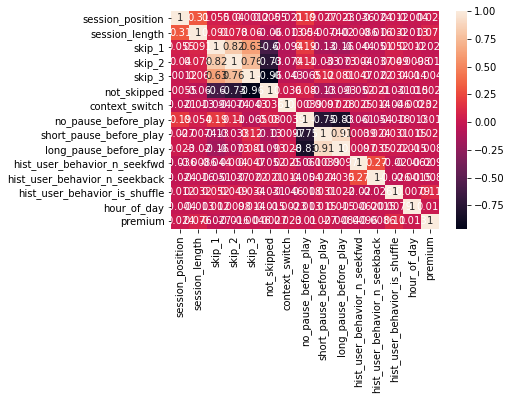

In [67]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

In [68]:
# Pairplot - Visulaize only Two varibles, Varibles- Continuous Catergorical or Booleans

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

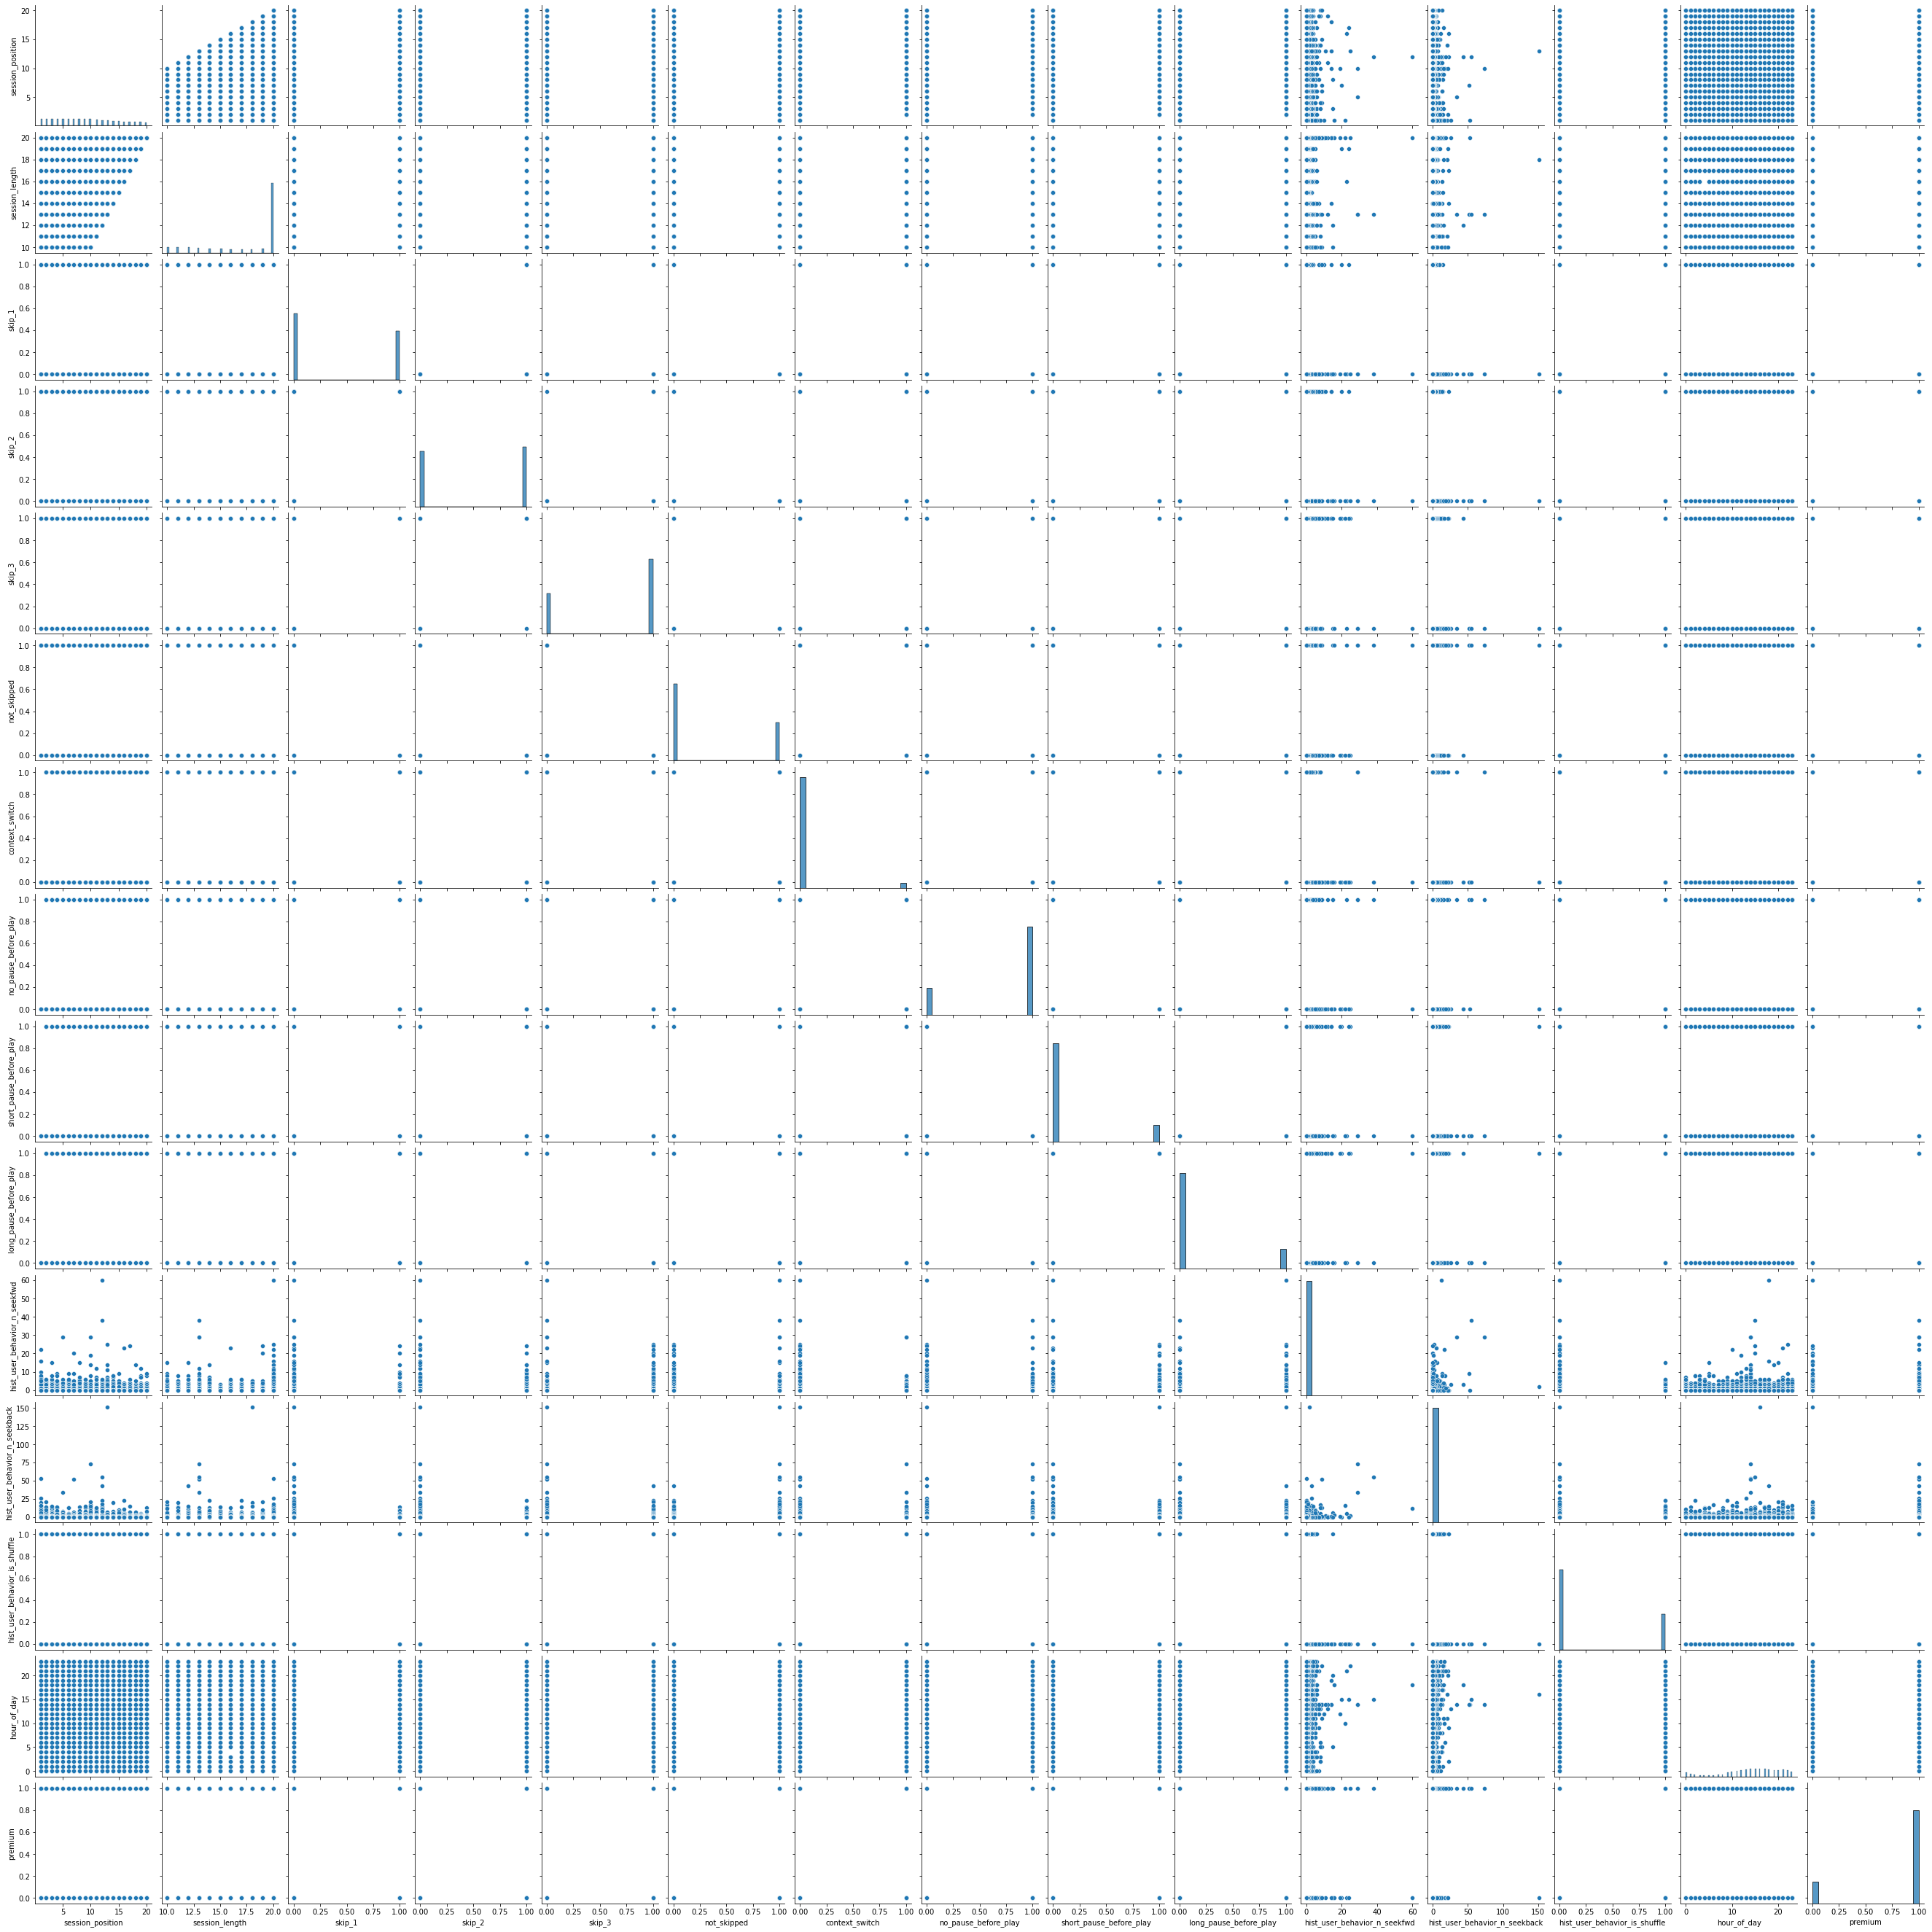

In [69]:
sns.pairplot(log_mini)

In [70]:
# Scatter Plot - relationship b/w two variables - Pending(need to do)

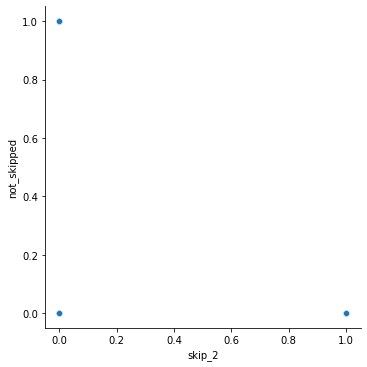

In [71]:
sns.relplot(x = 'skip_2', y = 'not_skipped', data = log_mini)

In [72]:
# Histogram - groups to ranges so taller bar show more data range fall in that

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='context_switch', ylabel='Density'>

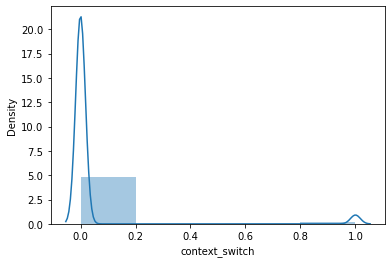

In [73]:
sns.distplot(log_mini['context_switch'],  bins = 5)

In [74]:
tf_mini = pd.read_csv('H:/Internship/kaggle/Technocolabs/tf_mini.csv')

In [75]:
tf_mini.head(5)

track_id    duration  release_year  \
0  t_a540e552-16d4-42f8-a185-232bd650ea7d  109.706673          1950   
1  t_67965da0-132b-4b1e-8a69-0ef99b32287c  187.693329          1950   
2  t_0614ecd3-a7d5-40a1-816e-156d5872a467  160.839996          1951   
3  t_070a63a0-744a-434e-9913-a97b02926a29  175.399994          1951   
4  t_d6990e17-9c31-4b01-8559-47d9ce476df1  369.600006          1951   

   us_popularity_estimate  acousticness  beat_strength  bounciness  \
0               99.975414      0.458040       0.519497    0.504949   
1               99.969430      0.916272       0.419223    0.545530   
2               99.602549      0.812884       0.425890    0.508280   
3               99.665018      0.396854       0.400934    0.359990   
4               99.991764      0.728831       0.371328    0.335115   

   danceability  dyn_range_mean    energy  ...  time_signature   valence  \
0      0.399767        7.511880  0.817709  ...               4  0.935512   
1      0.491235        9.098376  0.154258  ...               3  0.359675   
2      0.491625        8.368670  0.358813  ...               4  0.726769   
3      0.552227        5.967346  0.514585  ...               4  0.859075   
4      0.483044        5.802681  0.721442  ...               4  0.562343   

   acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  acoustic_vector_3  \
0          -0.033284          -0.411896          -0.028580           0.349438   
1           0.145703          -0.850372           0.123860           0.746904   
2           0.021720          -0.743634           0.333247           0.568447   
3           0.039143          -0.267555          -0.051825           0.106173   
4           0.131931          -0.292523          -0.174819          -0.034422   

  acoustic_vector_4  acoustic_vector_5  acoustic_vector_6  acoustic_vector_7  
0          0.832467          -0.213871          -0.299464          -0.675907  
1          0.371803          -0.420558          -0.213120          -0.525795  
2          0.411094          -0.187749          -0.387599          -0.433496  
3          0.614825          -0.111419          -0.265953          -0.542753  
4          0.717229          -0.016239          -0.392694          -0.455496  

[5 rows x 30 columns]

In [76]:
df = pd.merge(log_mini, tf_mini, left_on = 'track_id_clean', right_on = 'track_id')

In [77]:
df.head(5)

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00079a23-1600-486a-91bd-5208be0c745a                 7              12   
2  0_012b0fb4-0cc3-429f-9a78-cc6e622153fb                 6              20   
3  0_013cc010-c476-4ad2-8972-73449e0b2ef4                 9              13   
4  0_01a5f0dc-9938-48c9-92f1-c7e51f34d290                 7              12   

                           track_id_clean  skip_1  skip_2  skip_3  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
1  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False    True   
2  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
3  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
4  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False    True   

   not_skipped  context_switch  no_pause_before_play  ...  time_signature  \
0         True               0                     0  ...               4   
1        False               0                     0  ...               4   
2         True               0                     0  ...               4   
3         True               0                     1  ...               4   
4        False               0                     0  ...               4   

    valence  acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  \
0  0.152255          -0.815775           0.386409            0.23016   
1  0.152255          -0.815775           0.386409            0.23016   
2  0.152255          -0.815775           0.386409            0.23016   
3  0.152255          -0.815775           0.386409            0.23016   
4  0.152255          -0.815775           0.386409            0.23016   

   acoustic_vector_3 acoustic_vector_4  acoustic_vector_5 acoustic_vector_6  \
0           0.028028         -0.333373           0.015452          -0.35359   
1           0.028028         -0.333373           0.015452          -0.35359   
2           0.028028         -0.333373           0.015452          -0.35359   
3           0.028028         -0.333373           0.015452          -0.35359   
4           0.028028         -0.333373           0.015452          -0.35359   

  acoustic_vector_7  
0          0.205826  
1          0.205826  
2          0.205826  
3          0.205826  
4          0.205826  

[5 rows x 51 columns]

In [78]:
# how many catergories are there in columns
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')

session_id : 10000 labels
session_position : 20 labels
session_length : 11 labels
track_id_clean : 50704 labels
skip_1 : 2 labels
skip_2 : 2 labels
skip_3 : 2 labels
not_skipped : 2 labels
context_switch : 2 labels
no_pause_before_play : 2 labels
short_pause_before_play : 2 labels
long_pause_before_play : 2 labels
hist_user_behavior_n_seekfwd : 25 labels
hist_user_behavior_n_seekback : 30 labels
hist_user_behavior_is_shuffle : 2 labels
hour_of_day : 24 labels
date : 18 labels
premium : 2 labels
context_type : 6 labels
hist_user_behavior_reason_start : 9 labels
hist_user_behavior_reason_end : 7 labels
track_id : 50704 labels
duration : 33549 labels
release_year : 69 labels
us_popularity_estimate : 50704 labels
acousticness : 50673 labels
beat_strength : 50548 labels
bounciness : 50589 labels
danceability : 50580 labels
dyn_range_mean : 50580 labels
energy : 50582 labels
flatness : 49741 labels
instrumentalness : 50698 labels
key : 12 labels
liveness : 50649 labels
loudness : 13522 label

In [79]:
pd.get_dummies(df, drop_first = True).shape

MemoryError: Unable to allocate 7.93 GiB for an array with shape (167880, 50704) and data type uint8

In [ ]:
df2 = pd.get_dummies(df,columns=['context_type','hist_user_behavior_reason_start','hist_user_behavior_reason_end'])